# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup. No numpy? 
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (variables simplified for my fingers)
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
##Hey AC, if you're gonna change the variables remember to change ALL OF THEM
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
##syntax note - for the output to be the count, the brackets go outside the parentheses. act like you've been here before AC
###giving variables for use later
rides_bytype = pyber_df.groupby(["type"]).count()["ride_id"]
rides_bytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city t
drivers_bytype = pyber_df.groupby(["type"]).sum()["driver_count"]
drivers_bytype

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
faresum_bytype = pyber_df.groupby(["type"]).sum()["fare"]
faresum_bytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [45]:
#  4. Get the average fare per ride for each city type. 
#AvgFare_Ride = faresum_bytype / rides_bytype
#ok the above code makes the data, but it makes problems for us later in the merging. I have to give the environment proper labels for all the stuff we're dealing with so it can merge later. so I took the steps below

In [46]:
AvgFare_Ride2 = pd.DataFrame(data=(faresum_bytype / rides_bytype), index=('Rural','Suburban','Urban'))
AvgFare_Ride2.head()

,0
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [47]:
RF_avgFare = AvgFare_Ride2.reset_index()
RF_avgFare

,index,0
0,Rural,34.623440
1,Suburban,30.970128
2,Urban,24.525772


In [48]:
AvgFare_Ride = RF_avgFare.rename(columns={"index":"type",0:"AvgFare_Ride"})
AvgFare_Ride.head()

,type,AvgFare_Ride
0,Rural,34.623440
1,Suburban,30.970128
2,Urban,24.525772


In [23]:
# 5. Get the average fare per driver for each city type. 
#AvgFare_Driver = faresum_bytype / drivers_bytype
#same deal as last code. going through the same motions

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [50]:
AvgFare_Driver2 = pd.DataFrame(data=(faresum_bytype / drivers_bytype))
AvgFare_Driver2

,0
type,
Rural,8.059460
Suburban,2.258615
Urban,0.668675


In [52]:
AvgFare_perDriver = AvgFare_Driver2.rename(columns={"type":"type",0:"AvgFare_perDriver"})
AvgFare_perDriver

,AvgFare_perDriver
type,
Rural,8.059460
Suburban,2.258615
Urban,0.668675


In [53]:
#  6. Create a PyBer summary DataFrame. 
#i'm gonna confuse myself, so below is a list of columns needed
##sumRides / sumDrivers / sumFares / AvgFare.Ride / AvgFare.Driver
#below code does not work. gonna try something silly in the next cell
#pyber_summaryDF = pd.DataFrame(rides_bytype, drivers_bytype, faresum_bytype, AvgFare_Ride, AvgFare_Driver)
#pyber_summaryDF.head()

In [54]:
#  6b. Create a PyBer summary DataFrame (but in a silly way)
mixDF1 = pd.merge(rides_bytype, drivers_bytype, how='left', on='type')
mixDF1.head()
#it won't go farther than this. time to go to documentation
##looking back, this probably would have worked but I forgot to reinitialize the previous cell after hashing out the code. Either way, this method is time-consuming and doesn't lead to good documentation

,ride_id,driver_count
type,,
Rural,125,537
Suburban,625,8570
Urban,1625,59602


In [55]:
mixDF2 = pd.merge(mixDF1, faresum_bytype, how='left', on='type')
mixDF2.head()

,ride_id,driver_count,fare
type,,,
Rural,125,537,4327.93
Suburban,625,8570,19356.33
Urban,1625,59602,39854.38


In [56]:
mixDF3 = pd.merge(mixDF2, AvgFare_Ride, how='left', on='type')
mixDF3.head()

,type,ride_id,driver_count,fare,AvgFare_Ride
0,Rural,125,537,4327.93,34.623440
1,Suburban,625,8570,19356.33,30.970128
2,Urban,1625,59602,39854.38,24.525772


In [60]:
pyber_summaryDF = pd.merge(mixDF3, AvgFare_perDriver, how='left', on='type')
pyber_summaryDF.head()

,type,ride_id,driver_count,fare,AvgFare_Ride,AvgFare_perDriver
0,Rural,125,537,4327.93,34.623440,8.059460
1,Suburban,625,8570,19356.33,30.970128,2.258615
2,Urban,1625,59602,39854.38,24.525772,0.668675


In [61]:
# 6c. Create a PyBer summary DataFrame (but in a way i read in a book once)
###before i reformatted steps 4 and 5 this method worked, but to make sure the merging is correct I did a bunch of steps above. Leaving this cell just for preservation of methodology
#pyber_summaryDF = pd.concat([rides_bytype, drivers_bytype, faresum_bytype, AvgFare_Ride, AvgFare_Driver], axis=1)
#pyber_summaryDF.head()
##i'm gonna comment this cell out and try the first one to see if i just had my cells messed up or if this is a syntax thing i got wrong
###it's a syntax thing. Back to business

In [64]:
#  7. Cleaning up the DataFrame. Delete the index name
##i recognize that I made this step redundant by my formatting above, but an old iteration of this code made it necessary. leaving the step as it is part of assignment
pyber_summaryDF.index.name = None

In [65]:
pyber_summaryDF.head()

,type,ride_id,driver_count,fare,AvgFare_Ride,AvgFare_perDriver
0,Rural,125,537,4327.93,34.623440,8.059460
1,Suburban,625,8570,19356.33,30.970128,2.258615
2,Urban,1625,59602,39854.38,24.525772,0.668675


In [68]:
#  8. Format the columns.
#weird that we have numbers appended to last two columns. probably has to do with what function i used to make this DF but.. onward
##no longer wrangling numbers due to formatting above
summary_df = pyber_summaryDF.rename(columns={"type":"City Type","ride_id":"Total Rides","driver_count":"Total Drivers","fare":"Total Fares",0:"Avg Fare per Ride",1:"Total Rides"})
summary_df

,City Type,Total Rides,Total Drivers,Total Fares,AvgFare_Ride,AvgFare_perDriver
0,Rural,125,537,4327.93,34.623440,8.059460
1,Suburban,625,8570,19356.33,30.970128,2.258615
2,Urban,1625,59602,39854.38,24.525772,0.668675


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [69]:
# 1. Read the merged DataFrame
#pyber_df[['date','time']] = pyber_df.date.str.split(expand=True)
#i ran the above code and then my iteration got wonky with the later steps. so. commented out and restarted. i think i have to split later
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [70]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
datemerge_df = pyber_df.groupby(["type","date"])
datemerge_df.sum()["fare"]

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [71]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_df.reset_index()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [72]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivotDF = pyber_df.pivot(index='date', columns='type', values='fare')
pyber_pivotDF.head()
##i gotta tell ya. i looked at the output of this and thought i totally screwed this up. but then i scrolled down in the assignment so it looks like we're good

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [73]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
locced_DF = pyber_pivotDF.loc['2019-01-01':'2019-04-29']
locced_DF.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [74]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
locced_DF.index = pd.to_datetime(locced_DF.index)

In [81]:
# 7. Check that the datatype for the index is datetime using df.info()
locced_DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [171]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_DF = locced_DF.resample('W').sum()
resample_DF1 = resample_DF.reset_index()
resample_DF

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


C:\Users\carrd\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


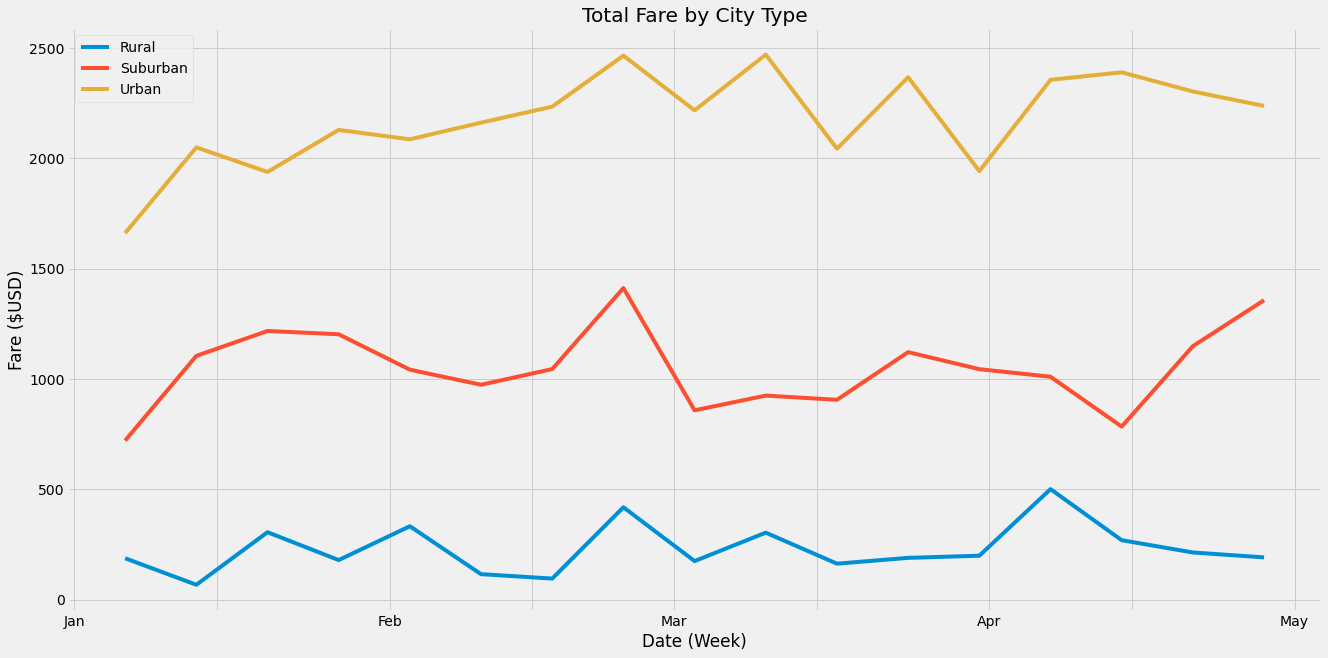

<Figure size 432x288 with 0 Axes>

In [184]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.set_ylabel("Fare ($USD)")
ax1.set_xlabel("Date (Week)")

ax1.set_title("Total Fare by City Type")
ax1.plot(resample_DF["Rural"])
ax1.plot(resample_DF["Suburban"])
ax1.plot(resample_DF["Urban"])
ax1.legend(['Rural','Suburban','Urban'],loc='best')
ax1.autoscale()

ax1.set_xticklabels(["Jan","","Feb","","Mar","","Apr","","May"])

plt.show()


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig('Analysis/PyBer_fare_summary.png')


4